In [ ]:
!pip install graphviz

https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
import multiprocessing

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz,export_text, plot_tree

from sklearn import metrics
import graphviz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.의사 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로 부터 추론된 결정 규칙을 통해 값을 예측
* **if-then-else** 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을 수록 복잡한 모델
* 결정 트리 장점
  * 이해와 해석이 쉽다
  * 시각화가 용이하다
  * 많은 데이터 전처리가 필요하지 않다
  * 수치형과 범주형 데이터 모두를 다룰 수 있다


# 2.Decision Tree Classifier의 파라미터

### 핵심 파라미터

> **min_samples_split** : 노드를 분할하기 위한 최소한의 샘플 데이터수 
( 과적합을 제어하는데 사용 ) <br>
Default = 2 → 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가<br>

> **min_samples_leaf**: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수<br>
min_samples_split과 함께 과적합 제어 용도<br>
불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요<br>


> **max_features**: 최적의 분할을 위해 고려할 최대 feature 개수 <br>
Default = None → 데이터 세트의 모든 피처를 사용<br>
int형으로 지정 →피처 갯수 / float형으로 지정 →비중<br>
sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정<br>
log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정<br>

> **max_depth**	: 트리의 최대 깊이<br>
default = None<br>
→ 완벽하게 클래스 값이 결정될 때 까지 분할<br>
또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할<br>
깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요<br>

> **max_leaf_nodes** :	리프노드의 최대 개수<br>


# 3.지니계수를 이용하여 데이터를 분할
- 지니계수 : 경제학에서 불평등지수를 나타낼 때 사용하는 것으로 0일 때 완전 평등, 1일 때 완전 불평등을 의미
- 머신러닝에서는 데이터가 다양한 값을 가질수록 평등하며 특정 값으로 쏠릴 때 불평등한 값이 됩니다.
- 다양성이 낮을수록 균일도가 높다는 의미로 1로 갈수록 균일도가 높아 지니계수가 높은 속성을 기준으로 분할


In [ ]:
iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['species'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x_data = iris['data']
y_data = iris['target']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                test_size=0.2, random_state=1,stratify=y_data)

In [ ]:
model_tree = DecisionTreeClassifier(criterion='gini') # or 'entropy'
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
import os
os.environ['PATH']+= os.pathsep + r'C:\Program Files\graphviz-2.44.1-win32\Graphviz\bin'


In [ ]:
export_graphviz(model_tree, out_file='tree.dot',
               class_names=iris['target_names'], feature_names = iris['feature_names'])

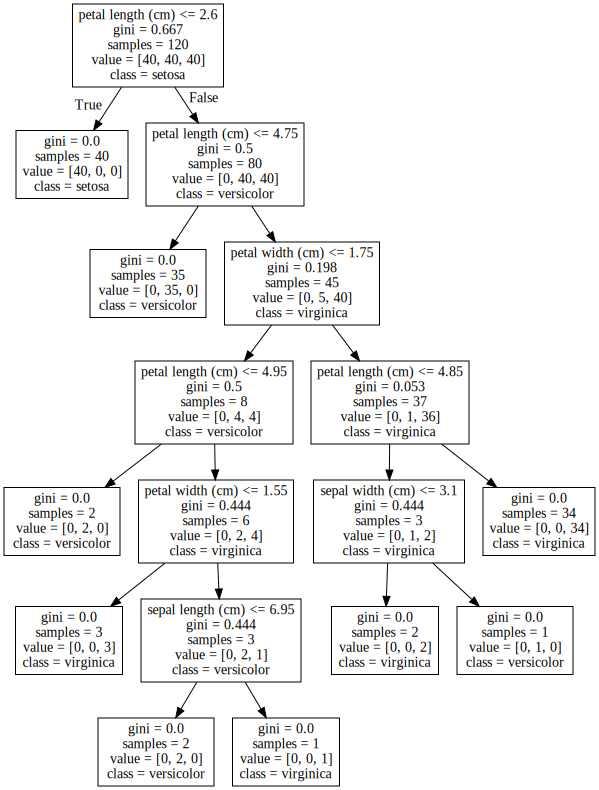

In [ ]:
# Decision Tree 그리기 graphviz
fp = open('tree.dot')
dot_graph = fp.read()
graphviz.Source(dot_graph)

[Text(334.79999999999995, 504.7714285714286, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(223.2, 427.11428571428576, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(446.4, 427.11428571428576, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(334.79999999999995, 349.4571428571429, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(558.0, 349.4571428571429, 'petal width (cm) <= 1.75\ngini = 0.198\nsamples = 45\nvalue = [0, 5, 40]'),
 Text(223.2, 271.8, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(111.6, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(334.79999999999995, 194.14285714285717, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(223.2, 116.48571428571432, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(446.4, 116.48571428571432, 'sepal length (cm) <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]

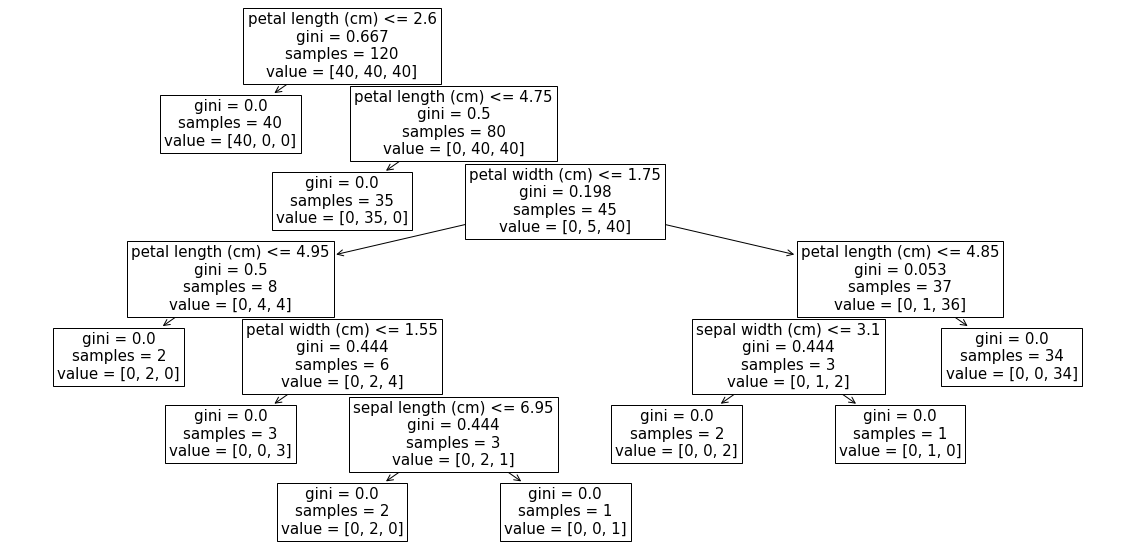

In [ ]:
# Decision Tree 그리기 plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_tree, feature_names= iris['feature_names'], fontsize = 15)

In [ ]:
model_tree.score(x_train,y_train)

1.0

In [ ]:
model_tree.score(x_test,y_test)

0.9666666666666667

In [ ]:
model_tree.feature_importances_

array([0.03333333, 0.        , 0.91321321, 0.05345345])

In [ ]:
import seaborn as sns

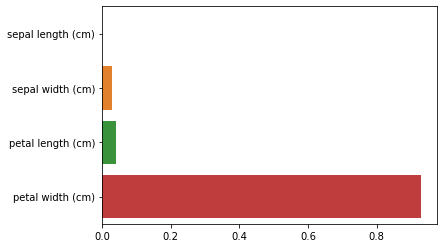

In [ ]:
sns.barplot( x=model_tree.feature_importances_, y=iris['feature_names'])
plt.show()


# 4.과적합 확인

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
pip_tree = make_pipeline(DecisionTreeClassifier(criterion='entropy'))

In [ ]:
param_range =  [2,3,4,5,6,7,8,9,10]

In [ ]:
train_score, test_score = validation_curve(estimator=pip_tree, X= x_train, y = y_train, 
                                           param_name='decisiontreeclassifier__max_depth', param_range=param_range,
                                           scoring = 'f1_macro', cv = 5, verbose = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [ ]:
train_score

array([[0.96868118, 0.95816993, 0.9582926 , 0.96868118, 0.96874237],
       [0.96868118, 0.95816993, 0.96874237, 0.9791463 , 0.9791463 ],
       [0.98958079, 0.97916667, 0.98958079, 1.        , 0.98958079],
       [1.        , 0.98958079, 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [ ]:
train_score.mean(axis=1)

array([0.96451346, 0.97077722, 0.98958181, 0.99791616, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [ ]:
test_score

array([[0.91534392, 0.95816993, 0.95816993, 0.91666667, 0.91666667],
       [0.8745098 , 0.95816993, 0.95816993, 0.95816993, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 0.95816993, 0.91666667, 0.95816993],
       [0.91666667, 0.95816993, 1.        , 0.91666667, 0.95816993]])

In [ ]:
test_score.mean(axis=1)

array([0.93300342, 0.94143791, 0.94993464, 0.94993464, 0.94156863,
       0.94156863, 0.94993464, 0.94156863, 0.94156863])

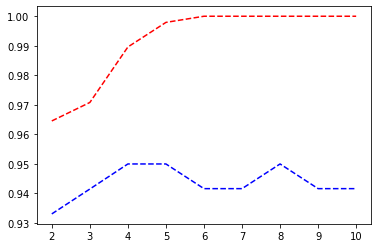

In [ ]:
plt.plot(param_range, train_score.mean(axis=1),'r--')
plt.plot(param_range, test_score.mean(axis=1),'b--')
plt.show()

# 과적합이 나는 경우는 train이랑 test의 차이가 큰 경우 6,7,9,10

# 4, 5, 8이 괜찮은 경우

$$
\begin{align}
H[Y] = -\sum_{k=1}^K p(y_k) \log_2 p(y_k)
\tag{1}
\end{align}
$$

한 영역 안에 존재하는 데이터 가운데 
범주 i에 속하는 데이터의 비율

In [ ]:
DecisionTreeClassifier(random_state = 0) # random_state를 여기다가 줘도 됨

DecisionTreeClassifier(random_state=0)

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_df['target'] = cancer['target']
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
x_data = cancer_df.iloc[:,:-1]
y_data = cancer_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2,
                                                    random_state=1, stratify=y_data)

param_range = [2,3,4,5,6,7,8,9,10]
pip = make_pipeline(StandardScaler(),
                    DecisionTreeClassifier(criterion='entropy',random_state=1))

train_score, test_score = validation_curve( estimator=pip, X = x_train, y = y_train,
                                            param_name='decisiontreeclassifier__max_depth', param_range=param_range,
                                            scoring='f1_macro', cv = 5, verbose = 1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


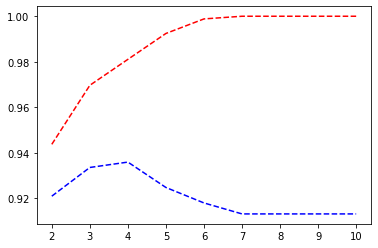

In [ ]:
plt.plot(param_range,train_score.mean(axis=1),'r--')
plt.plot(param_range,test_score.mean(axis=1),'b--')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.1s finished


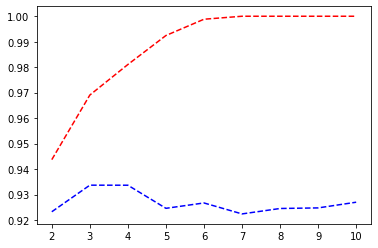

In [ ]:
x_data = cancer['data']
y_data = cancer['target']

x_train, x_test, y_train, y_test = train_test_split( x_data, y_data, test_size=0.2,
                                                   stratify=y_data, random_state=1)

train_score, test_score = validation_curve(estimator=pip_tree, X=x_train, y=y_train, 
                                           param_name='decisiontreeclassifier__max_depth',
                                           param_range=param_range, scoring='f1_macro',
                                           cv=5, verbose=1)

plt.plot(param_range, train_score.mean(axis=1), 'r--')
plt.plot(param_range, test_score.mean(axis=1), 'b--')

plt.show()